# 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

DATA_PATH = './DATA/' #데이터경로 설정
print('파일 크기: ')
for file in os.listdir(DATA_PATH):
    if 'txt' in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_PATH+ file) / 100000,2))+'MB')

ModuleNotFoundError: No module named 'wordcloud'

In [115]:
train_data = pd.read_table(DATA_PATH + 'ratings_train.txt')
test_data = pd.read_table(DATA_PATH + 'ratings_test.txt')
print('train 데이터 총 개수: ', len(train_data))

train 데이터 총 개수:  150000


In [116]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
print('test 데이터 총 개수: ', len(test_data)')

In [99]:
#트레인 파일 불러오기
train_data = pd.read_csv(DATA_PATH + 'ratings_train.txt',header = 0, delimiter = '\t', quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [101]:
print('학습데이터 전체 개수: {}'.format(len(train_data)))

학습데이터 전체 개수: 150000


In [107]:
#리뷰 전체길이 확인
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

In [27]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


In [28]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

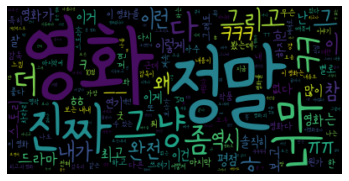

In [29]:
# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud = WordCloud(DATA_PATH+'hangeul.ttf').generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
#긍정 1, 부정 0
print('긍정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 갯수: 74827
부정 리뷰 갯수: 75173


# 데이터 전처리

In [31]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

DATA_PATH = './DATA/' # 데이터 경로 설정
train_data = pd.read_csv(DATA_PATH+'ratings_train.txt', header = 0, delimiter='\t', quoting=3)

train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [117]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
    review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
    word_review = okt.morphs(review_text,stem=True)

    if remove_stopwords:
    #3. 불용어 제거(선택)
        word_review = [token for token in word_review if not token in stop_words]
    return word_review

In [118]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '하다']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
  # 리뷰가 문자열인 경우만 전처리 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
    else:
        clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

KeyboardInterrupt: 

In [34]:
#테스트 리뷰도 동일하게 전처리
test_data = pd.read_csv(DATA_PATH + 'ratings_test.txt', header = 0, delimiter='\t', quoting=3)

clean_test_review = []
for review in test_data['document']:
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        clean_test_review.append([])

In [35]:
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train_data['label'])

#평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test_data['label'])

In [43]:
#DEFAULT_PATH  = '/content/sample_data/' # 경로지정
import sys
from importlib import reload
reload(sys)


DATA_PATH = './CLEAN_DATA/' #.npy파일 저장 경로지정
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DATA_PATH + DATA_CONFIGS,'w', encoding = 'utf-8'),ensure_ascii=False)

"""
#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
    os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DAFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)
"""

"\n#전처리한 데이터들 파일로저장\nimport os\n\nif not os.path.exists(DEFAULT_PATH + DATA_PATH):\n    os.makedirs(DEFAULT_PATH+DATA_PATH)\n\n#전처리 학습데이터 넘파이로 저장\nnp.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)\nnp.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)\n#전처리 테스트데이터 넘파이로 저장\nnp.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)\nnp.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)\n\n#데이터 사전 json으로 저장\njson.dump(data_configs,open(DAFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)\n"

# 모델링

In [46]:
# 학습 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

#전처리 데이터 불러오기
DATA_PATH = './CLEAN_DATA/'
DATA_OUT = './DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r', encoding = 'utf-8'))

# 파라미터 세팅

In [59]:
model_name= 'cnn_classifier_kr/'
BATCH_SIZE = 512
NUM_EPOCHS = 500
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 'vocab_size':prepro_configs['vocab_size'],'embbeding_size':128, 'num_filters':100,'dropout_rate':0.5, 'hidden_dimension':250,'output_dimension':1}

# 모델 함수 만들기

In [60]:
class CNNClassifier(tf.keras.Model):

    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                        kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                                activation = tf.keras.activations.relu,
                                kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                                activation=tf.keras.activations.sigmoid,
                                kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))
    

    def call(self,x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# 모델 학습

In [61]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [62]:
from tensorflow.keras.models import save_model

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

#검증 정확도를 통한 EarlyStopping 기능 및 모델 저장 방식 지정
#earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=500)
checkpoint_path = DATA_OUT + model_name +'weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
    save_weights_only=True
)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])
# 모델 저장하기
save_model(model,'./Model_Folder/')
#save_model(model,'모델 저장할 폴더 경로')

./DATA_OUT/cnn_classifier_kr -- Folder already exists 

Epoch 1/500
263/264 [============================>.] - ETA: 0s - loss: 0.4590 - accuracy: 0.7731
Epoch 00001: val_accuracy improved from -inf to 0.82080, saving model to ./DATA_OUT/cnn_classifier_kr/weights.h5
264/264 [==============================] - 7s 27ms/step - loss: 0.4586 - accuracy: 0.7733 - val_loss: 0.3891 - val_accuracy: 0.8208
Epoch 2/500
262/264 [============================>.] - ETA: 0s - loss: 0.3514 - accuracy: 0.8456
Epoch 00002: val_accuracy improved from 0.82080 to 0.82900, saving model to ./DATA_OUT/cnn_classifier_kr/weights.h5
264/264 [==============================] - 7s 25ms/step - loss: 0.3514 - accuracy: 0.8456 - val_loss: 0.3791 - val_accuracy: 0.8290
Epoch 3/500
263/264 [============================>.] - ETA: 0s - loss: 0.2988 - accuracy: 0.8742
Epoch 00003: val_accuracy did not improve from 0.82900
264/264 [==============================] - 7s 25ms/step - loss: 0.2987 - accuracy: 0.8742 - val_loss: 0.3

Epoch 58/500
264/264 [==============================] - ETA: 0s - loss: 0.0547 - accuracy: 0.9771
Epoch 00058: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 24ms/step - loss: 0.0547 - accuracy: 0.9771 - val_loss: 0.9303 - val_accuracy: 0.8089
Epoch 59/500
263/264 [============================>.] - ETA: 0s - loss: 0.0531 - accuracy: 0.9780
Epoch 00059: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0531 - accuracy: 0.9780 - val_loss: 0.9197 - val_accuracy: 0.8104
Epoch 60/500
264/264 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9781
Epoch 00060: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0525 - accuracy: 0.9781 - val_loss: 0.9190 - val_accuracy: 0.8105
Epoch 61/500
262/264 [============================>.] - ETA: 0s - loss: 0.0523 - accuracy: 0.9779
Epoch 00061: val_accuracy did not improve from 

Epoch 87/500
264/264 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9814
Epoch 00087: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 24ms/step - loss: 0.0440 - accuracy: 0.9814 - val_loss: 1.0494 - val_accuracy: 0.8137
Epoch 88/500
262/264 [============================>.] - ETA: 0s - loss: 0.0434 - accuracy: 0.9817
Epoch 00088: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0434 - accuracy: 0.9817 - val_loss: 1.0045 - val_accuracy: 0.8116
Epoch 89/500
263/264 [============================>.] - ETA: 0s - loss: 0.0446 - accuracy: 0.9812
Epoch 00089: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0446 - accuracy: 0.9812 - val_loss: 0.9900 - val_accuracy: 0.8139
Epoch 90/500
264/264 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9816
Epoch 00090: val_accuracy did not improve from 

Epoch 116/500
264/264 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9831
Epoch 00116: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0392 - accuracy: 0.9831 - val_loss: 1.0644 - val_accuracy: 0.8123
Epoch 117/500
263/264 [============================>.] - ETA: 0s - loss: 0.0383 - accuracy: 0.9835
Epoch 00117: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0384 - accuracy: 0.9835 - val_loss: 1.0845 - val_accuracy: 0.8143
Epoch 118/500
264/264 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 0.9833
Epoch 00118: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0386 - accuracy: 0.9833 - val_loss: 1.0334 - val_accuracy: 0.8100
Epoch 119/500
262/264 [============================>.] - ETA: 0s - loss: 0.0389 - accuracy: 0.9837
Epoch 00119: val_accuracy did not improve f

Epoch 145/500
262/264 [============================>.] - ETA: 0s - loss: 0.0352 - accuracy: 0.9851
Epoch 00145: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0352 - accuracy: 0.9851 - val_loss: 1.1447 - val_accuracy: 0.8157
Epoch 146/500
264/264 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9844
Epoch 00146: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0358 - accuracy: 0.9844 - val_loss: 1.0906 - val_accuracy: 0.8139
Epoch 147/500
262/264 [============================>.] - ETA: 0s - loss: 0.0352 - accuracy: 0.9850
Epoch 00147: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0353 - accuracy: 0.9850 - val_loss: 1.1244 - val_accuracy: 0.8169
Epoch 148/500
262/264 [============================>.] - ETA: 0s - loss: 0.0347 - accuracy: 0.9852
Epoch 00148: val_accuracy did not improve f

Epoch 174/500
264/264 [==============================] - ETA: 0s - loss: 0.0339 - accuracy: 0.9852
Epoch 00174: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0339 - accuracy: 0.9852 - val_loss: 1.1033 - val_accuracy: 0.8109
Epoch 175/500
264/264 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9857
Epoch 00175: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0331 - accuracy: 0.9857 - val_loss: 1.1018 - val_accuracy: 0.8091
Epoch 176/500
263/264 [============================>.] - ETA: 0s - loss: 0.0329 - accuracy: 0.9857
Epoch 00176: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0329 - accuracy: 0.9857 - val_loss: 1.1578 - val_accuracy: 0.8102
Epoch 177/500
262/264 [============================>.] - ETA: 0s - loss: 0.0319 - accuracy: 0.9860
Epoch 00177: val_accuracy did not improve f

Epoch 203/500
264/264 [==============================] - ETA: 0s - loss: 0.0312 - accuracy: 0.9867
Epoch 00203: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 1.1565 - val_accuracy: 0.8118
Epoch 204/500
262/264 [============================>.] - ETA: 0s - loss: 0.0320 - accuracy: 0.9863
Epoch 00204: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0319 - accuracy: 0.9864 - val_loss: 1.1315 - val_accuracy: 0.8123
Epoch 205/500
262/264 [============================>.] - ETA: 0s - loss: 0.0306 - accuracy: 0.9865
Epoch 00205: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0306 - accuracy: 0.9865 - val_loss: 1.1915 - val_accuracy: 0.8114
Epoch 206/500
263/264 [============================>.] - ETA: 0s - loss: 0.0308 - accuracy: 0.9864
Epoch 00206: val_accuracy did not improve f

Epoch 232/500
263/264 [============================>.] - ETA: 0s - loss: 0.0289 - accuracy: 0.9870
Epoch 00232: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0289 - accuracy: 0.9870 - val_loss: 1.2401 - val_accuracy: 0.8093
Epoch 233/500
262/264 [============================>.] - ETA: 0s - loss: 0.0297 - accuracy: 0.9872
Epoch 00233: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0297 - accuracy: 0.9872 - val_loss: 1.1735 - val_accuracy: 0.8077
Epoch 234/500
262/264 [============================>.] - ETA: 0s - loss: 0.0296 - accuracy: 0.9870
Epoch 00234: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0295 - accuracy: 0.9870 - val_loss: 1.1932 - val_accuracy: 0.8117
Epoch 235/500
264/264 [==============================] - ETA: 0s - loss: 0.0296 - accuracy: 0.9873
Epoch 00235: val_accuracy did not improve f

Epoch 261/500
263/264 [============================>.] - ETA: 0s - loss: 0.0282 - accuracy: 0.9874
Epoch 00261: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0281 - accuracy: 0.9874 - val_loss: 1.2510 - val_accuracy: 0.8125
Epoch 262/500
263/264 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9874
Epoch 00262: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 24ms/step - loss: 0.0286 - accuracy: 0.9875 - val_loss: 1.2455 - val_accuracy: 0.8119
Epoch 263/500
262/264 [============================>.] - ETA: 0s - loss: 0.0283 - accuracy: 0.9878
Epoch 00263: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0283 - accuracy: 0.9878 - val_loss: 1.2112 - val_accuracy: 0.8146
Epoch 264/500
263/264 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9879
Epoch 00264: val_accuracy did not improve f

Epoch 290/500
262/264 [============================>.] - ETA: 0s - loss: 0.0281 - accuracy: 0.9876
Epoch 00290: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0281 - accuracy: 0.9876 - val_loss: 1.2150 - val_accuracy: 0.8109
Epoch 291/500
264/264 [==============================] - ETA: 0s - loss: 0.0270 - accuracy: 0.9881
Epoch 00291: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0270 - accuracy: 0.9881 - val_loss: 1.2973 - val_accuracy: 0.8124
Epoch 292/500
262/264 [============================>.] - ETA: 0s - loss: 0.0278 - accuracy: 0.9876
Epoch 00292: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0278 - accuracy: 0.9876 - val_loss: 1.2260 - val_accuracy: 0.8118
Epoch 293/500
262/264 [============================>.] - ETA: 0s - loss: 0.0284 - accuracy: 0.9876
Epoch 00293: val_accuracy did not improve f

Epoch 319/500
262/264 [============================>.] - ETA: 0s - loss: 0.0269 - accuracy: 0.9881
Epoch 00319: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0268 - accuracy: 0.9881 - val_loss: 1.2335 - val_accuracy: 0.8106
Epoch 320/500
263/264 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9880
Epoch 00320: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0266 - accuracy: 0.9880 - val_loss: 1.2547 - val_accuracy: 0.8079
Epoch 321/500
264/264 [==============================] - ETA: 0s - loss: 0.0271 - accuracy: 0.9878
Epoch 00321: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0271 - accuracy: 0.9878 - val_loss: 1.3052 - val_accuracy: 0.8092
Epoch 322/500
262/264 [============================>.] - ETA: 0s - loss: 0.0268 - accuracy: 0.9882
Epoch 00322: val_accuracy did not improve f

Epoch 348/500
264/264 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9884
Epoch 00348: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0258 - accuracy: 0.9884 - val_loss: 1.2913 - val_accuracy: 0.8129
Epoch 349/500
262/264 [============================>.] - ETA: 0s - loss: 0.0267 - accuracy: 0.9882
Epoch 00349: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 21ms/step - loss: 0.0267 - accuracy: 0.9882 - val_loss: 1.2644 - val_accuracy: 0.8111
Epoch 350/500
262/264 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9885
Epoch 00350: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 21ms/step - loss: 0.0256 - accuracy: 0.9885 - val_loss: 1.2706 - val_accuracy: 0.8102
Epoch 351/500
262/264 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9884
Epoch 00351: val_accuracy did not improve f

Epoch 377/500
264/264 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9884
Epoch 00377: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0258 - accuracy: 0.9884 - val_loss: 1.2793 - val_accuracy: 0.8126
Epoch 378/500
264/264 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9886
Epoch 00378: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0255 - accuracy: 0.9886 - val_loss: 1.3189 - val_accuracy: 0.8131
Epoch 379/500
262/264 [============================>.] - ETA: 0s - loss: 0.0254 - accuracy: 0.9885
Epoch 00379: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0254 - accuracy: 0.9885 - val_loss: 1.2824 - val_accuracy: 0.8141
Epoch 380/500
262/264 [============================>.] - ETA: 0s - loss: 0.0254 - accuracy: 0.9888
Epoch 00380: val_accuracy did not improve f

Epoch 406/500
263/264 [============================>.] - ETA: 0s - loss: 0.0252 - accuracy: 0.9889
Epoch 00406: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0252 - accuracy: 0.9889 - val_loss: 1.2173 - val_accuracy: 0.8103
Epoch 407/500
263/264 [============================>.] - ETA: 0s - loss: 0.0248 - accuracy: 0.9889
Epoch 00407: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0248 - accuracy: 0.9889 - val_loss: 1.3171 - val_accuracy: 0.8133
Epoch 408/500
262/264 [============================>.] - ETA: 0s - loss: 0.0256 - accuracy: 0.9887
Epoch 00408: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0257 - accuracy: 0.9887 - val_loss: 1.2577 - val_accuracy: 0.8134
Epoch 409/500
263/264 [============================>.] - ETA: 0s - loss: 0.0249 - accuracy: 0.9889
Epoch 00409: val_accuracy did not improve f

Epoch 435/500
263/264 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9885
Epoch 00435: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0257 - accuracy: 0.9885 - val_loss: 1.2454 - val_accuracy: 0.8095
Epoch 436/500
263/264 [============================>.] - ETA: 0s - loss: 0.0244 - accuracy: 0.9890
Epoch 00436: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0244 - accuracy: 0.9891 - val_loss: 1.3201 - val_accuracy: 0.8159
Epoch 437/500
263/264 [============================>.] - ETA: 0s - loss: 0.0246 - accuracy: 0.9889
Epoch 00437: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0246 - accuracy: 0.9889 - val_loss: 1.3151 - val_accuracy: 0.8127
Epoch 438/500
263/264 [============================>.] - ETA: 0s - loss: 0.0239 - accuracy: 0.9891
Epoch 00438: val_accuracy did not improve f

Epoch 464/500
264/264 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9889
Epoch 00464: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0247 - accuracy: 0.9889 - val_loss: 1.3858 - val_accuracy: 0.8141
Epoch 465/500
264/264 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9893
Epoch 00465: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0240 - accuracy: 0.9893 - val_loss: 1.3512 - val_accuracy: 0.8107
Epoch 466/500
263/264 [============================>.] - ETA: 0s - loss: 0.0241 - accuracy: 0.9890
Epoch 00466: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0240 - accuracy: 0.9890 - val_loss: 1.3210 - val_accuracy: 0.8123
Epoch 467/500
263/264 [============================>.] - ETA: 0s - loss: 0.0242 - accuracy: 0.9890
Epoch 00467: val_accuracy did not improve f

Epoch 493/500
263/264 [============================>.] - ETA: 0s - loss: 0.0239 - accuracy: 0.9893
Epoch 00493: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 23ms/step - loss: 0.0239 - accuracy: 0.9893 - val_loss: 1.2857 - val_accuracy: 0.8111
Epoch 494/500
263/264 [============================>.] - ETA: 0s - loss: 0.0239 - accuracy: 0.9890
Epoch 00494: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0240 - accuracy: 0.9890 - val_loss: 1.3219 - val_accuracy: 0.8117
Epoch 495/500
263/264 [============================>.] - ETA: 0s - loss: 0.0240 - accuracy: 0.9891
Epoch 00495: val_accuracy did not improve from 0.82900
264/264 [==============================] - 6s 22ms/step - loss: 0.0240 - accuracy: 0.9891 - val_loss: 1.3248 - val_accuracy: 0.8115
Epoch 496/500
263/264 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9893
Epoch 00496: val_accuracy did not improve f

In [63]:
# 평가하기

INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights('DATA_OUT/cnn_classifier_kr/weights.h5') # model.load_weights('모델저장위치/weights.h5')
model.evaluate(test_input, test_label_data)

1563/1563 [==============================] - 4s 2ms/step - loss: 0.3823 - accuracy: 0.8263


[0.38228777050971985, 0.8263000249862671]

# 긍정 부정 예측

In [88]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
okt = Okt()
tokenizer  = Tokenizer()

DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('./CLEAN_DATA/'+DATA_CONFIGS,'r', encoding='utf-8'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 10 #문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'] # 불용어 추가할 것이 있으면 이곳에 추가
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
vector  = tokenizer.texts_to_sequences(sentence)
pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩

#model = tf.saved_model.load('DATA_OUT/cnn_classifier_kr/')
#model.load_weights('/content/sample_data/DATA_OUT/cnn_classifier_kr\weights.h5') #모델 불러오기
model.load_weights('DATA_OUT/cnn_classifier_kr/weights.h5') #모델 불러오기
predictions = model.predict(pad_new)
predictions = float(predictions.squeeze(-1)[1])

if(predictions > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(predictions * 100))
else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - predictions) * 100))

감성분석할 문장을 입력해 주세요.: 최태민과 내연관계라는 사실이 보고서로 올라갔고 최태민과의 추문이 사건의 발단인데 거기엔 입 다무는게 위대한 침묵이냐? 누가 들으면 나라라도 지키다가 탄핵 당한 줄 알겠는데? 심지어 친미국가는 아무도 참석 안한 중국 전승절에 참석하는 역대급 친중행위를 해 놓고 뭘 잘했다고 이럴까? 이딴 인간이 대통령까지 해 먹었다는 사실이 수치스러울 정도다
55.43% 확률로 긍정 리뷰입니다.

